##**Problem Statement**:
####This project aims to discover natural groupings of animals using unsupervised clustering techniques on the Zoo dataset. By analyzing biological and behavioral features—without relying on predefined class labels—we seek to uncover interpretable clusters that reflect shared traits or ecological roles.



## **Data Retrievel**:
####I retrieved data from UCI repository : https://archive.ics.uci.edu/dataset/111/zoo

## **Data Loading**

In [ ]:
#Necessary libraries
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.metrics import silhouette_score

In [ ]:
column_names = [
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
    'legs', 'tail', 'domestic', 'catsize', 'class_type'
]

In [ ]:
df = pd.read_csv('zoo.data', header=None, names=column_names)
df.set_index('animal_name', inplace=True)
df.drop('class_type',axis=1,inplace=True)

##**Domain Understanding**
#### Lesser-Known Animals – Short Descriptions

- **Aardvark**: Nocturnal mammal with a long snout and strong claws.
- **Chub**: Small freshwater fish, often found in rivers.
- **Clam**: Shell-covered mollusk that lives buried in sand.
- **Crayfish**: Freshwater crustacean resembling a small lobster.
- **Dogfish**: Small shark species with a slender body.
- **Flea**: Tiny insect that feeds on blood.
- **Fruitbat**: Bat species that eats fruit.
- **Gnat**: Small flying insect, similar to a mosquito.
- **Haddock**: Marine fish, similar to cod.
- **Herring**: Silvery schooling fish, often used in food.
- **Mink**: Small, semi-aquatic mammal with dark fur.
- **Mole**: Burrowing mammal with poor eyesight.
- **Mongoose**: Small predator known for fighting snakes.
- **Opossum**: Marsupial with a prehensile tail.
- **Oryx**: Antelope with long, straight horns.
- **Platypus**: Egg-laying mammal with a duck-like bill.
- **Polecat**: Small carnivore, related to ferrets.
- **Rhea**: Large flightless bird from South America.
- **Scorpion**: Arachnid with pincers and a venomous tail.
- **Seahorse**: Marine animal with a curled tail and horse-like head.
- **Seasnake**: Venomous snake adapted to ocean life.
- **Seawasp**: Highly venomous jellyfish.
- **Skimmer**: Bird with a long lower beak for skimming water.
- **Skua**: Aggressive seabird, often scavenges.
- **Slowworm**: Legless lizard, looks like a snake.
- **Sole**: Flatfish with both eyes on one side.
- **Starfish**: Marine animal with five arms.
- **Stingray**: Flat fish with a venomous tail.
- **Tuatara**: Ancient reptile found only in New Zealand.
- **Vampire (bat)**: Bat that feeds on blood.
- **Vole**: Small rodent, similar to a mouse.
- **Wallaby**: Small marsupial, similar to a kangaroo.


In [ ]:
df.index.values

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',

In [ ]:
df.sort_values(by='legs',ascending=False)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,,,,,,,,,,,,,,,,
octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1
scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0
termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0


##**Descriptive Analysis**

In [ ]:
df.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
dtypes: int64(16)
memory usage: 13.4+ KB


In [ ]:
df.describe().T #All are binary except legs , need to scale

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


##**Exploratory Data Analysis**
####Univariate Analysis

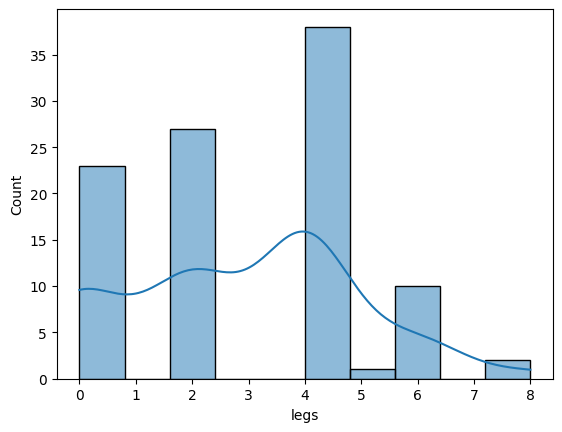

In [ ]:
sns.histplot(df['legs'],kde=True)
plt.show()

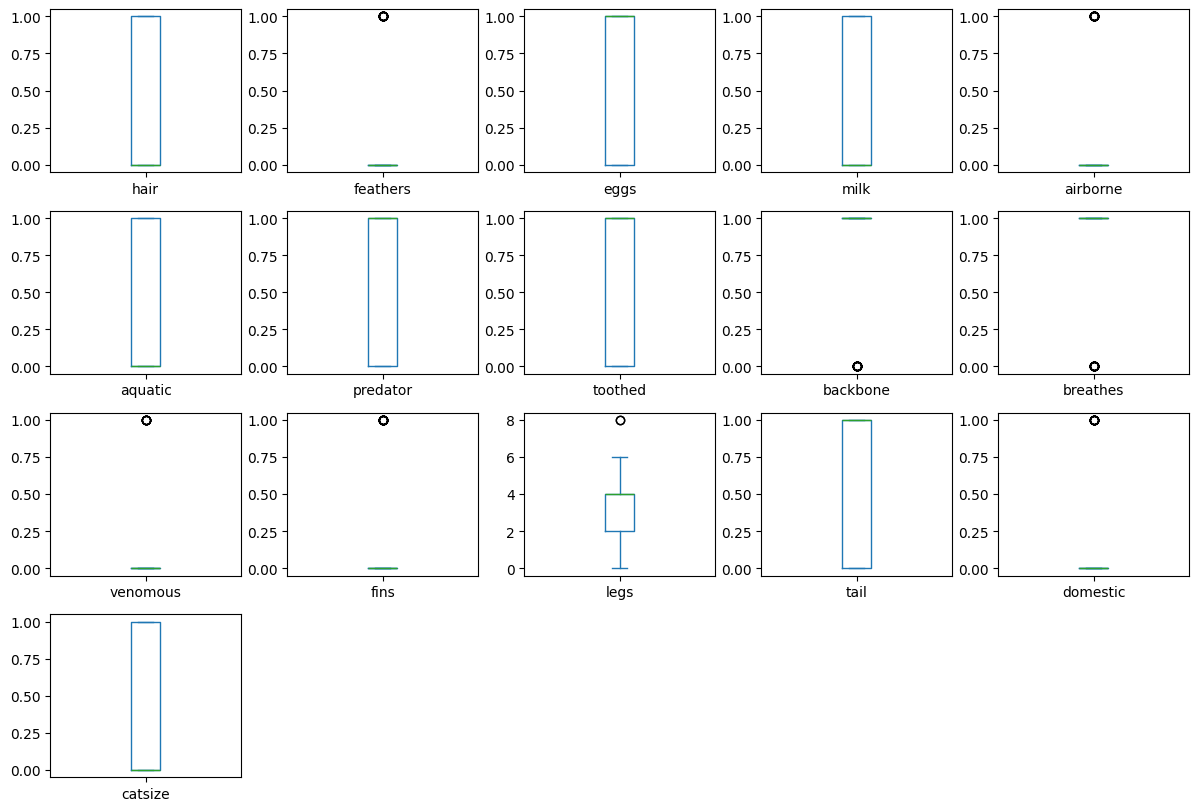

In [ ]:
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(12,10))
plt.tight_layout()
plt.show()

<Axes: >

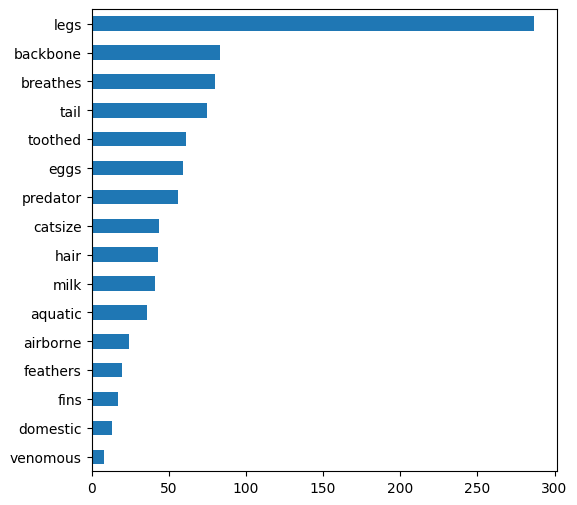

In [ ]:
df.sum().sort_values().plot(kind='barh',figsize=(6,6))

#### Multivariate Analysis

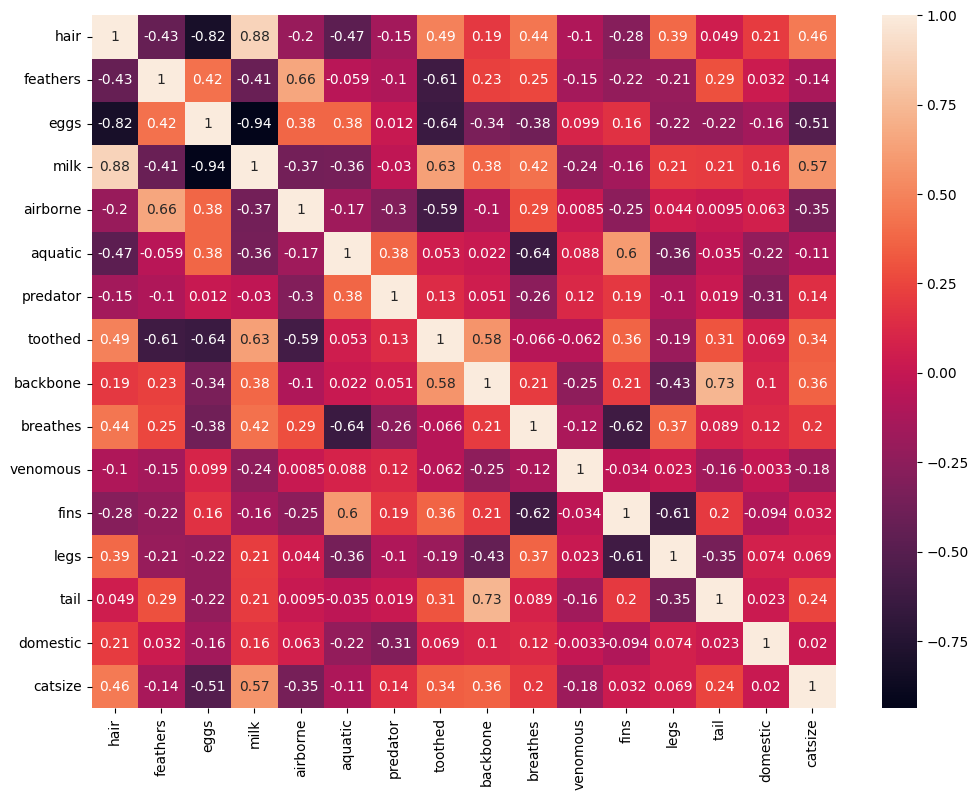

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,fmt=".2g",cmap='rocket')
plt.show()

## **Interpretation**
*   The majority of animals in the dataset have 4 legs, indicating a common locomotion trait across species.

*   Only two animals—octopus and scorpion—have 8 legs, representing unique locomotor adaptations among invertebrates.

*   No statistical outliers were detected across the features, suggesting consistent trait encoding and clean data quality.

*   The strong negative correlation between `milk` and `eggs` (−0.94) reflects a fundamental evolutionary divide: Mammals produce milk and do not lay eggs, while egg-laying species do not produce milk. This mutual exclusivity drives the inverse relationship.

## **Data preprocessing**

In [ ]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


**Feature Scaling**  
Only the `legs` feature was scaled using `MinMaxScaler`, as all other features are binary (0/1). This ensures uniform magnitude across features without distorting binary semantics.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['legs']=scaler.fit_transform(df[['legs']])
df.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,0.5,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0.0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,0.5,1,0,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,0.5,1,0,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,0.5,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0.0,1,1,0
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0.0,1,0,0


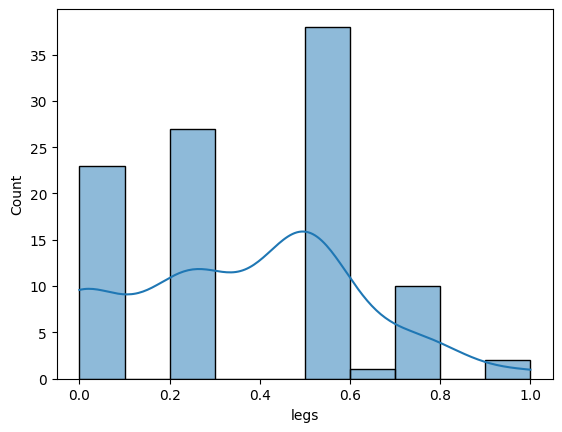

In [ ]:
sns.histplot(df['legs'],kde=True) #Values are normalized
plt.show()

## **Model Training**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#### Dendrogram using Ward linkage with Euclidean distance

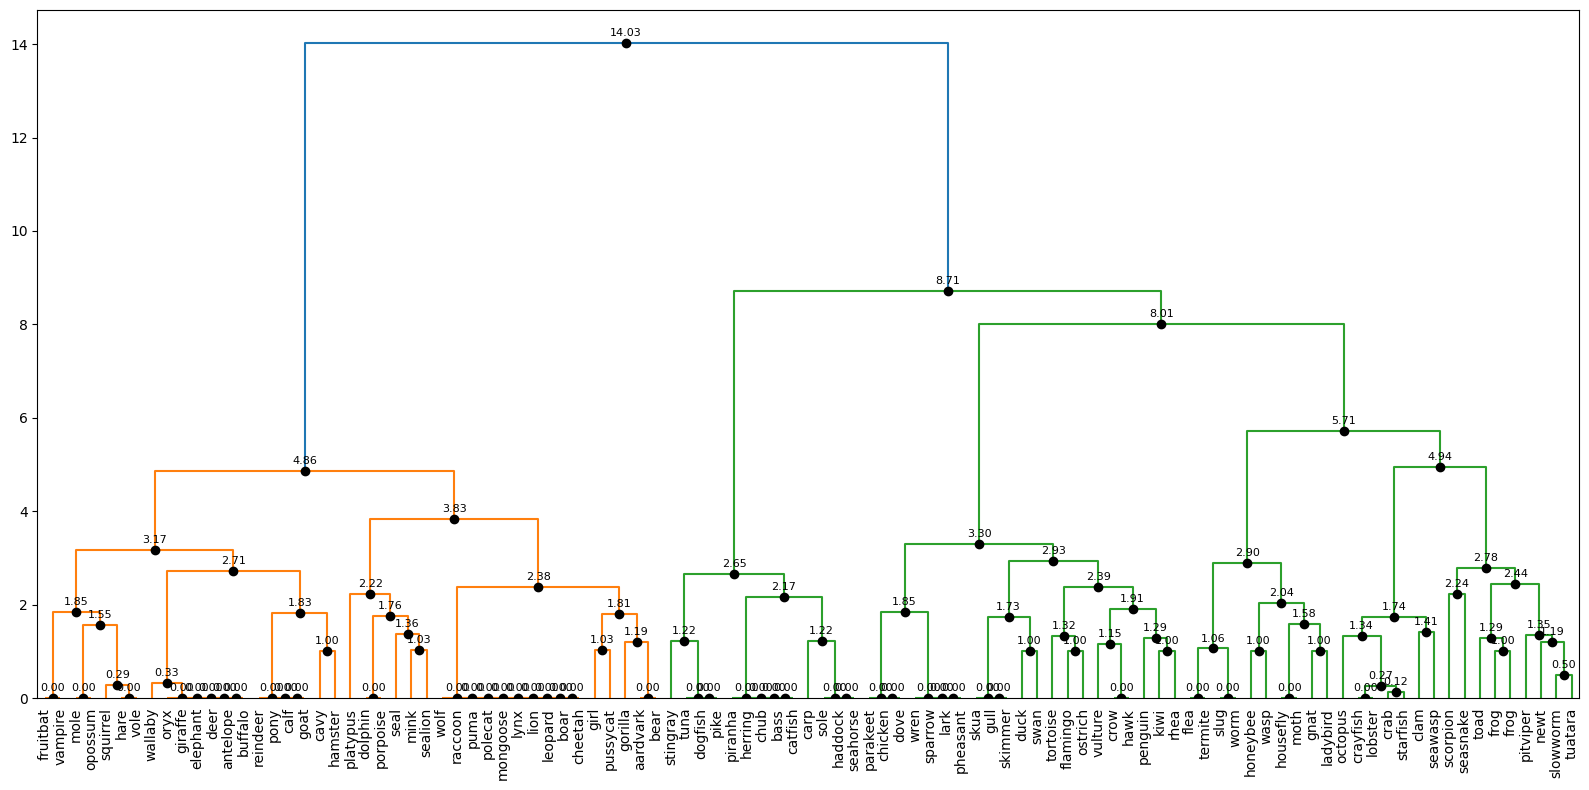

In [ ]:
linkage_matrix = linkage(df, method='ward')
plt.figure(figsize=(16, 8))
ddata = dendrogram(linkage_matrix,
                   labels=df.index.tolist(),
                   leaf_rotation=90,
                   leaf_font_size=10)
for i, d in zip(ddata['icoord'], ddata['dcoord']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    plt.plot(x, y, 'o', c='k')
    plt.annotate(f"{y:.2f}", (x, y), xytext=(0, 5),
                 textcoords='offset points', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

#### Dendrogram using Single linkage with euclidean distance

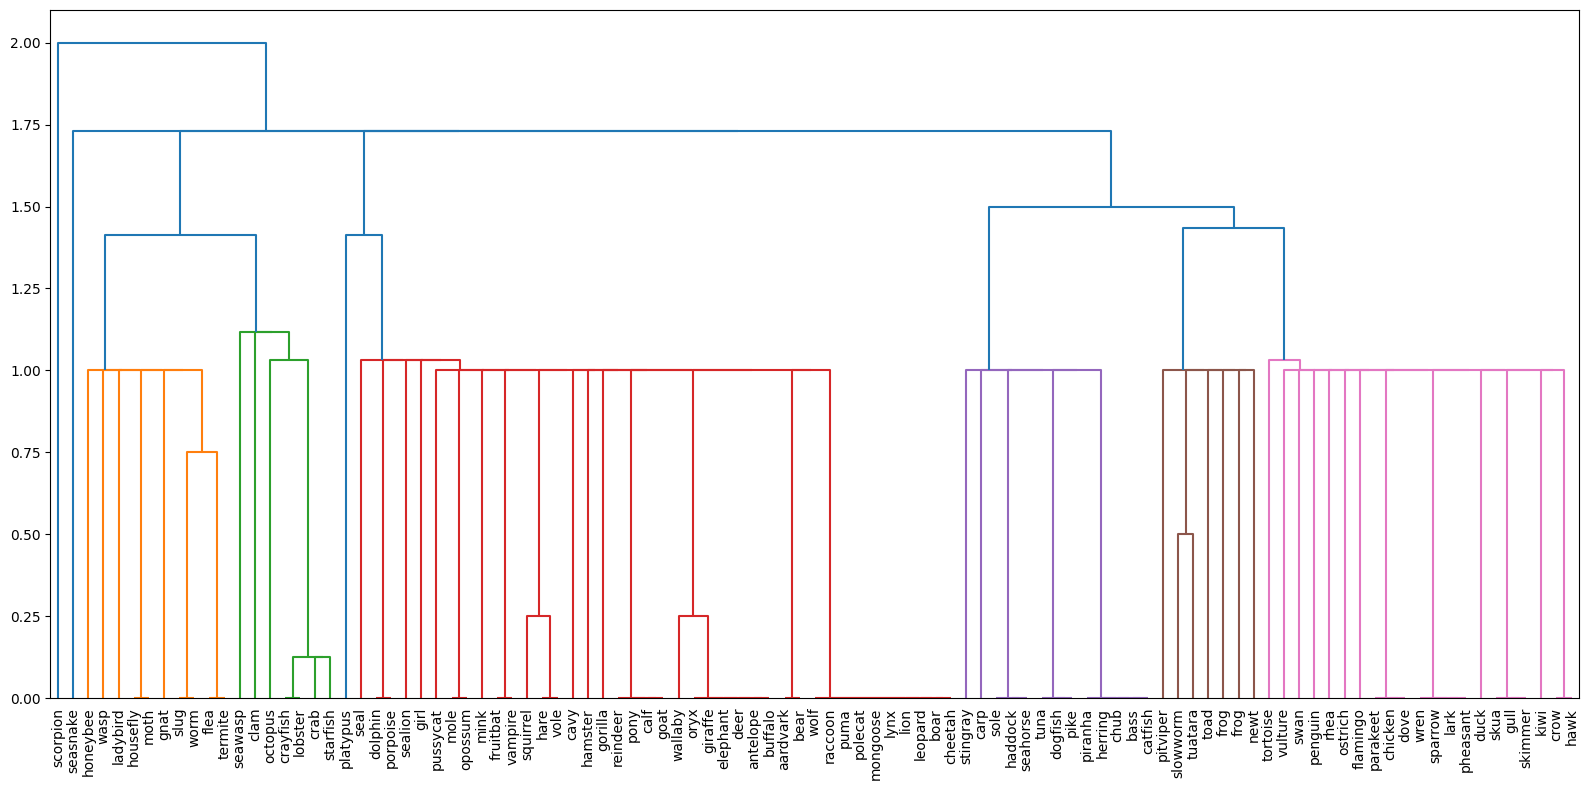

In [ ]:
linkage_matrix = linkage(df, method='single', metric='euclidean')
plt.figure(figsize=(16, 8))
ddata = dendrogram(linkage_matrix,
                   labels=df.index.tolist(),
                   leaf_rotation=90,
                   leaf_font_size=10)
plt.tight_layout()
plt.show()

#### Dendrogram using Complete linkage with euclidean distance

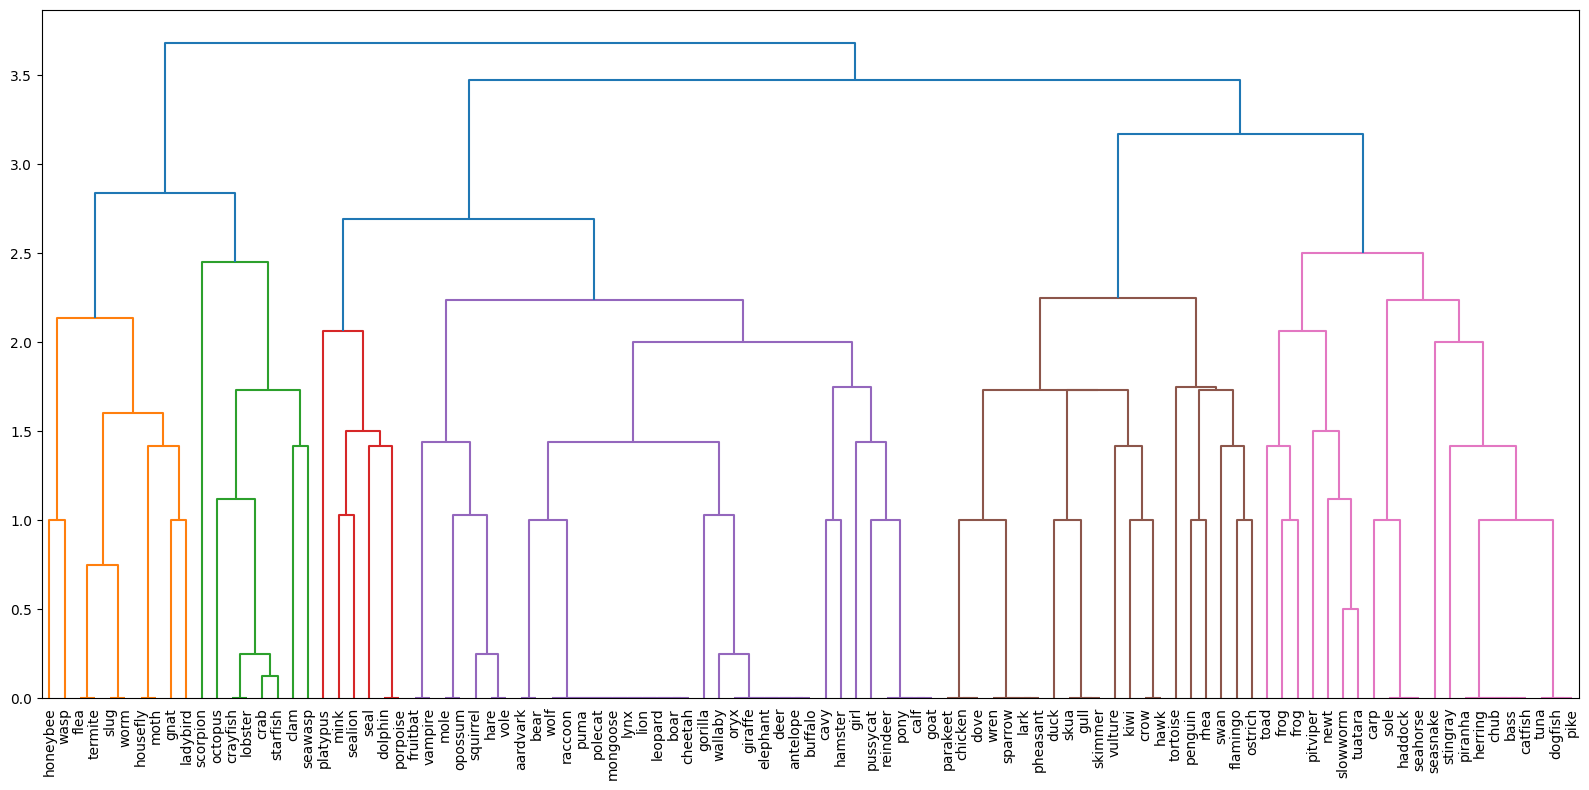

In [ ]:
linkage_matrix = linkage(df, method='complete', metric='euclidean')
plt.figure(figsize=(16, 8))
ddata = dendrogram(linkage_matrix,
                   labels=df.index.tolist(),
                   leaf_rotation=90,
                   leaf_font_size=10)
plt.tight_layout()
plt.show()

#### Dendrogram using Average linkage with euclidean distance

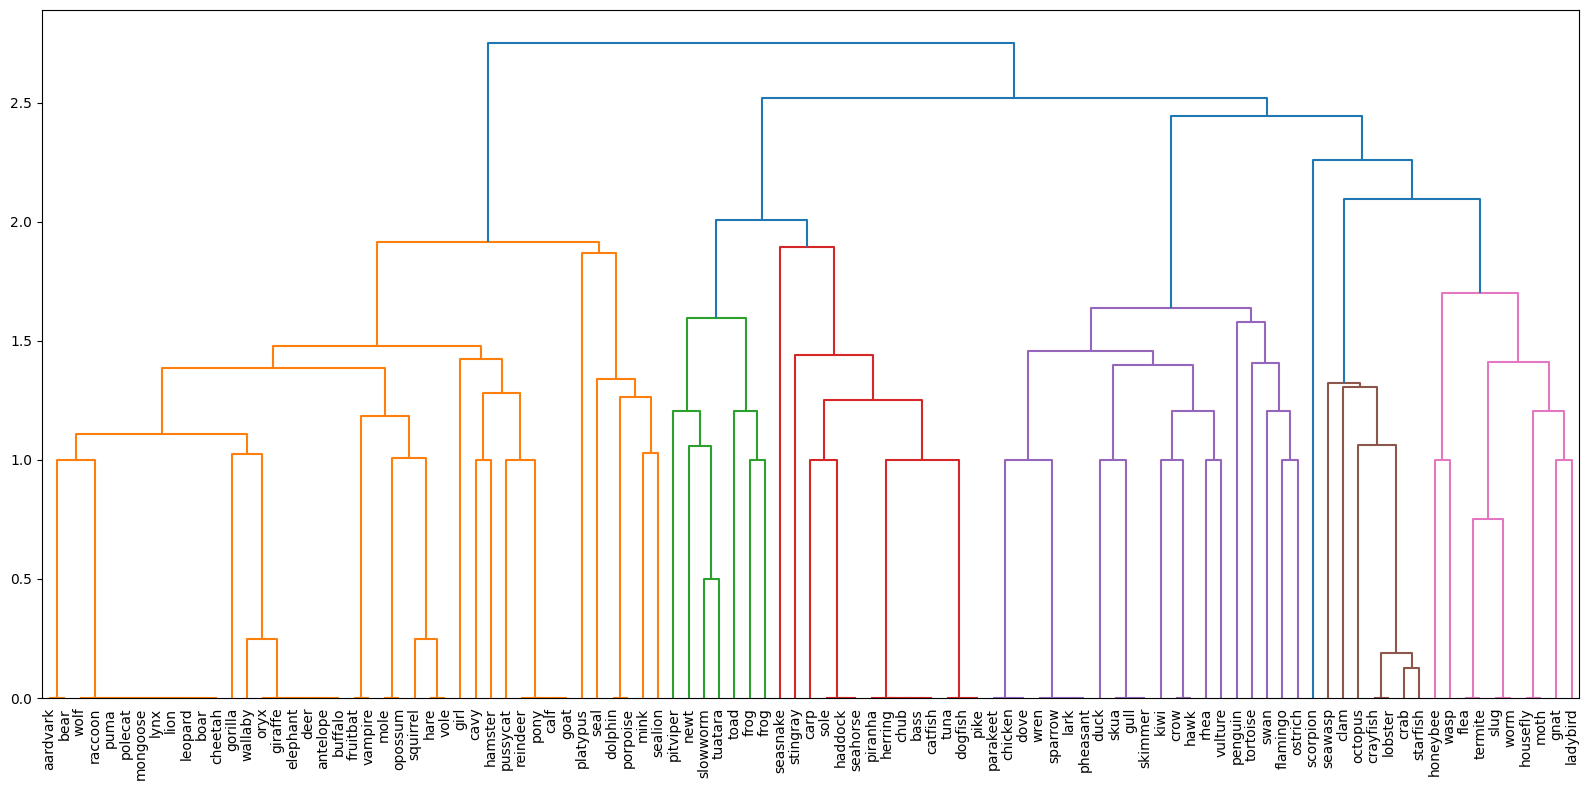

In [ ]:
linkage_matrix = linkage(df, method='average', metric='euclidean')
plt.figure(figsize=(16, 8))
ddata = dendrogram(linkage_matrix,
                   labels=df.index.tolist(),
                   leaf_rotation=90,
                   leaf_font_size=10)
plt.tight_layout()
plt.show()

#### Implementing KMeans Clustering to view how our animals traits are splitted

In [ ]:
from sklearn.cluster import KMeans

data = [
    # Mammals
    ["lion", 1,0,0,0,0,0],
    ["tiger", 1,0,0,0,0,0],
    ["elephant", 1,0,0,0,0,0],
    ["wolf", 1,0,0,0,0,0],

    # Birds
    ["eagle", 0,1,0,0,0,0],
    ["sparrow", 0,1,0,0,0,0],
    ["owl", 0,1,0,0,0,0],
    ["penguin", 0,1,0,0,0,1],   # penguin is aquatic too

    # Fish
    ["salmon", 0,0,1,0,0,1],
    ["shark", 0,0,1,0,0,1],
    ["tuna", 0,0,1,0,0,1],
    ["goldfish", 0,0,1,0,0,1],

    # Reptile/Amphibian
    ["snake", 0,0,0,1,0,0],
    ["lizard", 0,0,0,1,0,0],
    ["frog", 0,0,0,1,0,0],
    ["turtle", 0,0,0,1,0,1],

    # Insects
    ["ant", 0,0,0,0,1,0],
    ["bee", 0,0,0,0,1,0],
    ["butterfly", 0,0,0,0,1,0],
    ["mosquito", 0,0,0,0,1,0],

    # Aquatic mammals (extra balance)
    ["dolphin", 1,0,0,0,0,1],
    ["seal",     1,0,0,0,0,1],
    ["otter",    1,0,0,0,0,1],
    ["whale",    1,0,0,0,0,1],
]

cols = ["animal","mammal","bird","fish","reptile_amphibian","insect","aquatic"]
df = pd.DataFrame(data, columns=cols)

animals = df["animal"]
X = df.drop(columns=["animal"])

In [ ]:
X

,mammal,bird,fish,reptile_amphibian,insect,aquatic
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,1
8,0,0,1,0,0,1
9,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
kmeans=KMeans(n_clusters=6,init='k-means++',max_iter=300)
kmeans.fit(X_scaled)

KMeans(n_clusters=6)

In [ ]:
labels=kmeans.labels_
labels

array([5, 5, 5, 5, 2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0,
       0, 0], dtype=int32)

In [ ]:
silhouette_score(X_scaled,labels)

np.float64(0.901166754315407)

In [ ]:
X_scaled

array([[ 1.41421356, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [ 1.41421356, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [ 1.41421356, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [ 1.41421356, -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [-0.70710678,  2.23606798, -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [-0.70710678,  2.23606798, -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [-0.70710678,  2.23606798, -0.4472136 , -0.4472136 , -0.4472136 ,
        -0.84515425],
       [-0.70710678,  2.23606798, -0.4472136 , -0.4472136 , -0.4472136 ,
         1.18321596],
       [-0.70710678, -0.4472136 ,  2.23606798, -0.4472136 , -0.4472136 ,
         1.18321596],
       [-0.70710678, -0.4472136 ,  2.23606798, -0.4472136 , -0.4472136 ,
         1.18321596],
       [-0.70710678, -0.4472136 ,  2.23606798, -0.

#### Reducing dimensions using PCA to view clusters in 2D plot.To understand how PCA works : https://github.com/sabarimurugans47/FUNDAMENTALS-FOR-ML-AND-DL/blob/main/11.PCA.ipynb

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.30149492, 0.23170188])

In [ ]:
pc1=pca.components_[0]
pc2=pca.components_[1]

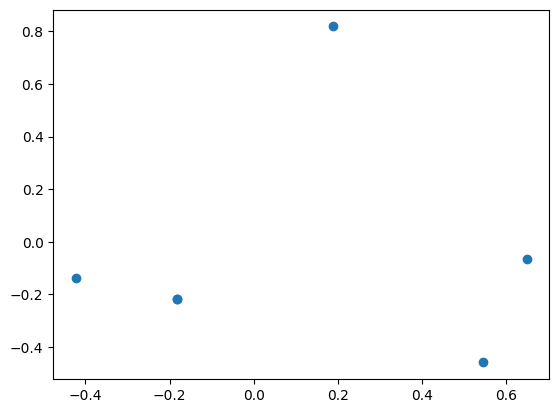

In [ ]:
plt.scatter(pc1,pc2)
plt.show()

#### Inference Stage

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
df_final = pd.read_csv('zoo.data', header=None, names=column_names)
df_final.set_index('animal_name', inplace=True)

In [ ]:
df_final

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [ ]:
X = df_final.drop("class_type", axis=1)
pipeline=make_pipeline(
    StandardScaler(),
    AgglomerativeClustering(n_clusters=5,metric='cosine',linkage='average')
)
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('agglomerativeclustering',
                 AgglomerativeClustering(linkage='average', metric='cosine',
                                         n_clusters=5))])

In [ ]:
import joblib
joblib.dump(pipeline, "animal_clustering.pkl")

['animal_clustering.pkl']



---

